<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/logit_iris_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ロジスティック回帰
ロジスティック回帰によるアヤメのデータ（２次元）の識別

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
#from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
target_names = iris.target_names

print('Size of the data = ', X.shape)
n = X.shape[0]
mdim = X.shape[1]
print('N=', n, 'mdim=', mdim)
print('size of y', y.shape)


Size of the data =  (100, 2)
N= 100 mdim= 2
size of y (100,)


Logistic 回帰による学習（L2正則化：C=1.0）

In [3]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("Mean Accuracy: %.4f" % clf_LR.score(X, y))
print("Sparsity of the parameters: %.2f%%" % sparsity_LR)

yy = clf_LR.predict(X)
pp = clf_LR.predict_proba(X)
print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)

Mean Accuracy: 1.0000
Sparsity of the parameters: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Estimated Probability
 [[0.89862418 0.10137582]
 [0.78359907 0.21640093]
 [0.92462453 0.07537547]
 [0.92501865 0.07498135]
 [0.94224748 0.05775252]
 [0.92181202 0.07818798]
 [0.96829853 0.03170147]
 [0.89913942 0.10086058]
 [0.92580121 0.07419879]
 [0.83047053 0.16952947]
 [0.86562571 0.13437429]
 [0.94286133 0.05713867]
 [0.83126711 0.16873289]
 [0.95827292 0.04172708]
 [0.82316624 0.17683376]
 [0.95498163 0.04501837]
 [0.92181202 0.07818798]
 [0.89862418 0.10137582]
 [0.77581034 0.22418966]
 [0.95642144 0.04357856]
 [0.72236447 0.27763553]
 [0.94193823 0.05806177]
 [0.98242556 0.01757444]
 [0.82886838 0.17113162]
 [0.94286133 0.05713867]
 [0.72688892 0.27311108]
 [0.89913942 0.10086058]
 [0.86693898 0.13306102

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


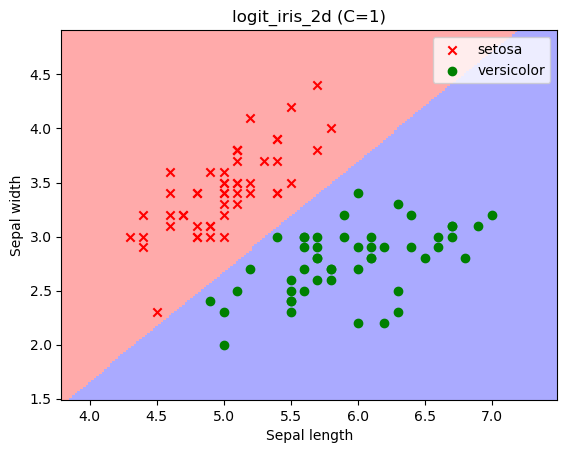

In [4]:
%matplotlib inline
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d (C=1)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_C1.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

Logistic回帰による学習（L2正則化：C=1000.0）

In [5]:
clf_LR = LogisticRegression(C=0.0001, penalty='l2', tol=1e-6)
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("Mean Accuracy: %.4f" % clf_LR.score(X, y))
print("Sparsity of the parameters: %.2f%%" % sparsity_LR)


yy = clf_LR.predict(X)

pp = clf_LR.predict_proba(X)

print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)


Mean Accuracy: 0.9800
Sparsity of the parameters: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Estimated Probability
 [[0.5003802  0.4996198 ]
 [0.50029085 0.49970915]
 [0.50048916 0.49951084]
 [0.50050613 0.49949387]
 [0.50047935 0.49952065]
 [0.50037039 0.49962961]
 [0.5006294  0.4993706 ]
 [0.50039717 0.49960283]
 [0.50054006 0.49945994]
 [0.50033195 0.49966805]
 [0.50028821 0.49971179]
 [0.50051328 0.49948672]
 [0.50034891 0.49965109]
 [0.50063921 0.49936079]
 [0.50017925 0.49982075]
 [0.50040168 0.49959832]
 [0.50037039 0.49962961]
 [0.5003802  0.4996198 ]
 [0.50015512 0.49984488]
 [0.50050348 0.49949652]
 [0.50016493 0.49983507]
 [0.50046238 0.49953762]
 [0.50071159 0.49928841]
 [0.50029801 0.49970199]
 [0.50051328 0.49948672]
 [0.5002328  0.4997672 ]
 [0.50039717 0.49960283]
 [0.50032214 0.49967786

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


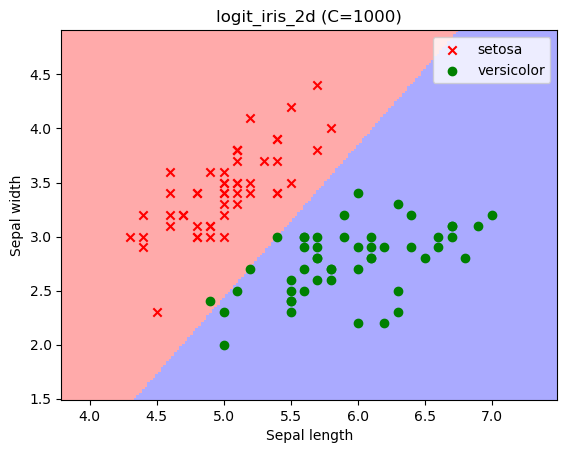

In [6]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d (C=1000)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_C1000.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

## 多項Logistic回帰（3クラス）（L2正則化：C=1.0）

In [7]:
# 3 classes classification

# Data 
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)
n = X.shape[0]
mdim = X.shape[1]
print('N=', n, 'mdim=', mdim)
print('size of y', y.shape)

Size of the data =  (150, 2)
N= 150 mdim= 2
size of y (150,)


In [8]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=1e-6, multi_class='multinomial', solver ='newton-cg')
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("Mean Accuracy: %.4f" % clf_LR.score(X, y))
print("Sparsity of the parameters: %.2f%%" % sparsity_LR)

yy = clf_LR.predict(X)
pp = clf_LR.predict_proba(X)
print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)

Mean Accuracy: 0.8200
Sparsity of the parameters: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Estimated Probability
 [[9.23471523e-01 5.85094862e-02 1.80189904e-02]
 [7.91561805e-01 1.80915490e-01 2.75227051e-02]
 [9.42363113e-01 5.08643189e-02 6.77256831e-03]
 [9.40552682e-01 5.37602491e-02 5.68706926e-03]
 [9.61852333e-01 2.96150994e-02 8.53256810e-03]
 [9.43194379e-01 3.40889652e-02 2.27166556e-02]
 [9.80228224e-01 1.74174104e-02 2.35436506e-03]
 [9.22925797e-01 6.19231090e-02 1.51510945e-02]
 [9.35998282e-01 5.99956250e-02 4.00609269e-03]
 [8.47179167e-01 1.31167307e-01 2.16535259e-02]
 [8.90211548e-01 7.01111375e-02 3.96773149e-02]
 [9.60792655e-01 3.31742299e-02 6.03311474e-03]
 [8.43552577e-01 1.3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


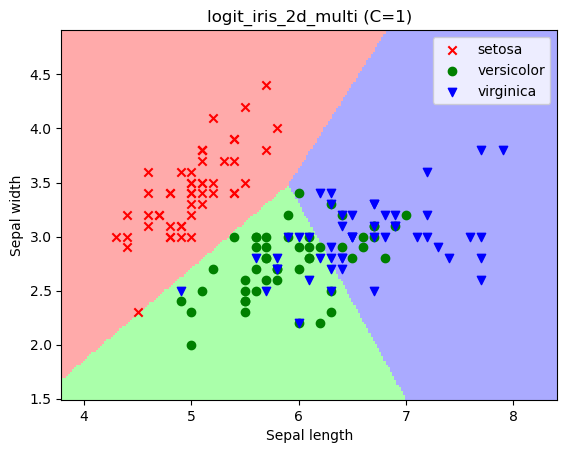

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d_multi (C=1)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_3class_C1.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()